#### Ques 1 : Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from MakeDataset import X_train,X_test,y_train,y_test

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [2]:
# loading the data
Laying_data = pd.read_csv('./Combined/Train/Laying/Subject_1.csv')
Sitting_data = pd.read_csv('./Combined/Train/Sitting/Subject_1.csv')
Standing_data = pd.read_csv('./Combined/Train/Standing/Subject_1.csv')
Walking_data = pd.read_csv('./Combined/Train/Walking/Subject_1.csv')
WalkingDownStairs_data = pd.read_csv('./Combined/Train/Walking_DownStairs/Subject_1.csv')
WalkingUpStairs_data = pd.read_csv('./Combined/Train/Walking_UpStairs/Subject_1.csv')


# creating dictionary to hold the data for each activity
activity_data = {
    'Laying' : Laying_data,
    'Sitting' : Sitting_data,
    'Standing' : Standing_data,
    'Walking' : Walking_data,
    'Walking DownStairs' : WalkingDownStairs_data,
    'Walking UpStairs' : WalkingUpStairs_data
}


print(Laying_data.head())


       accx      accy      accz
0  0.181141  0.787813  0.581194
1  0.180389  0.788230  0.584017
2  0.184572  0.788880  0.580620
3  0.187104  0.788494  0.574279
4  0.186461  0.786544  0.570184


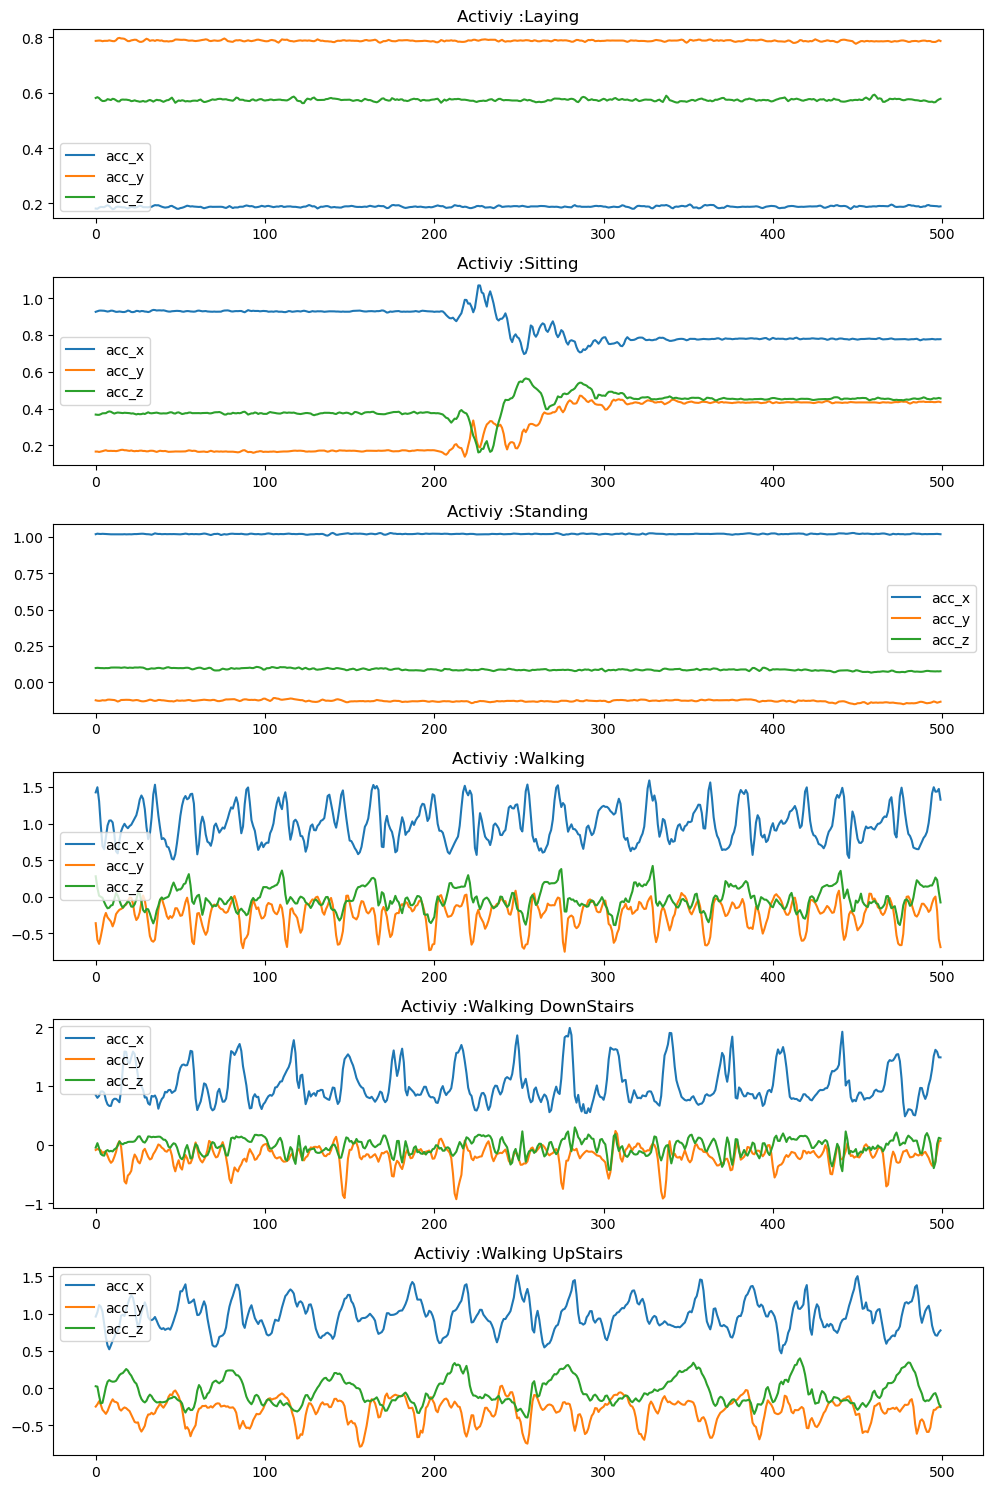

In [3]:
# ploting the wave form
fig, axes = plt.subplots(len(activity_data), 1, figsize = (10, 15))

for i, (activity, data) in enumerate(activity_data.items()):
    axes[i].plot(data['accx'][:500], label='acc_x')
    axes[i].plot(data['accy'][:500], label='acc_y')
    axes[i].plot(data['accz'][:500], label='acc_z')

    axes[i].set_title(f'Activiy :{activity}')
    axes[i].legend()

# adjust layout for better visibility
plt.tight_layout()
plt.show()

#### Static Activity : Sitting, Standing and Laying all have relatively flat waveform since there is minimal movement, so the acceration value over time remain constant over time 
#### Dynamic Activity : Walking, Walking upstair, Walking Downstair all have oscillating waveform because the object is in continous motion 

#### Yes, the model should be able to classify activities based on the data (Static Activity have majorly flat waveform whereas the Dynamic Activity have majorly oscillating waveform)

### 2) Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration (accx^2 + accy^2 + accz^2) for each activity and justify your answer.

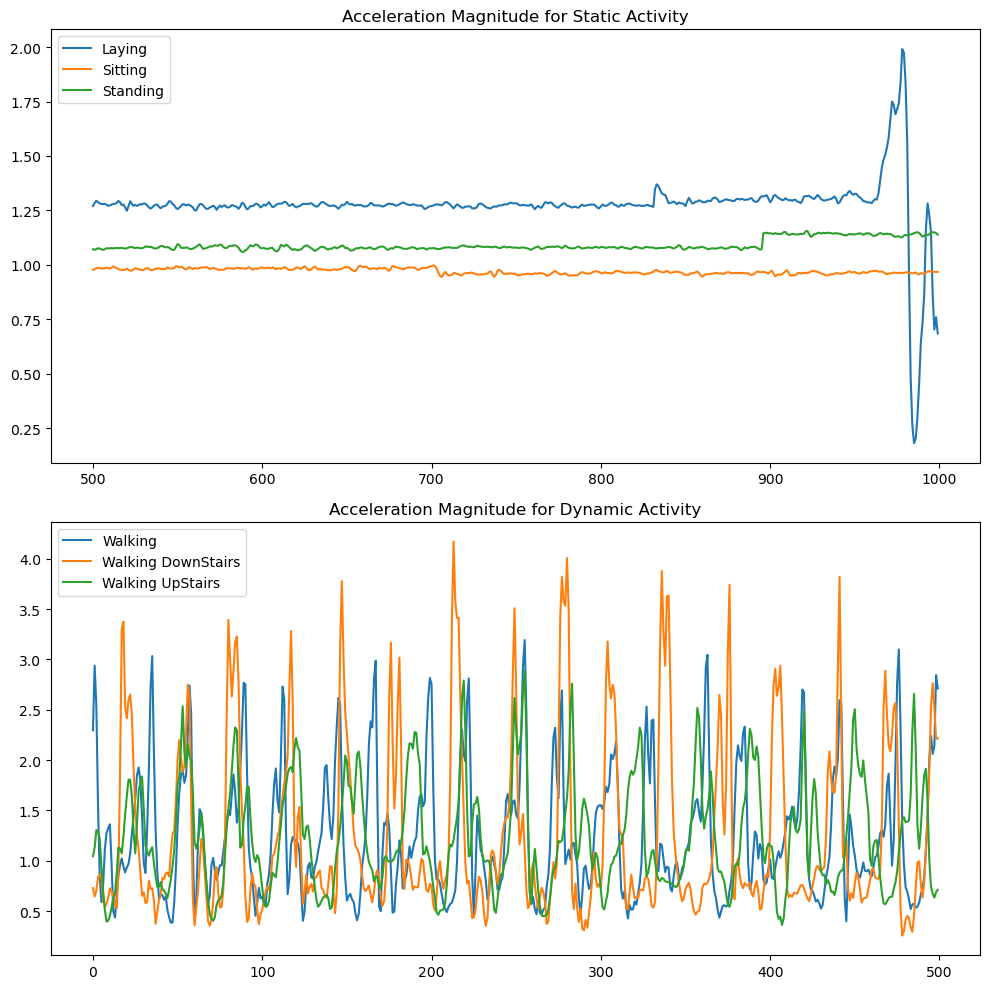

In [4]:
# Computing the acceraltion magnitude
def compute_acceleration(data):
    return (data['accx']**2 + data['accy']**2 + data['accy']**2)


# computing the acceleration magnitude
Laying_acc = compute_acceleration(Laying_data)
Sitting_acc = compute_acceleration(Sitting_data)
Standing_acc = compute_acceleration(Standing_data)
Walking_acc = compute_acceleration(Walking_data)
WalkingDownStairs_acc = compute_acceleration(WalkingDownStairs_data)
WalkingUpStairs_acc = compute_acceleration(WalkingUpStairs_data)


fig, axes = plt.subplots(2, 1 , figsize = (10, 10))
# static Activity 
# axes[0].plot(Laying_acc[:500], label ='Laying') 
# axes[0].plot(Sitting_acc[:500], label = 'Sitting')
# axes[0].plot(Standing_acc[:500], label = 'Standing')
# axes[0].set_title("Acceleration Magnitude for Static Activity")
# axes[0].legend()

axes[0].plot(Laying_acc[500:1000], label ='Laying') 
axes[0].plot(Sitting_acc[500:1000], label = 'Sitting')
axes[0].plot(Standing_acc[500:1000], label = 'Standing')
axes[0].set_title("Acceleration Magnitude for Static Activity")
axes[0].legend()



axes[1].plot(Walking_acc[:500], label='Walking')
axes[1].plot(WalkingDownStairs_acc[:500], label = 'Walking DownStairs')
axes[1].plot(WalkingUpStairs_acc[:500], label = 'Walking UpStairs')
axes[1].set_title("Acceleration Magnitude for Dynamic Activity")
axes[1].legend()

plt.tight_layout()
plt.show()

#### Q3)Visualize the data using PCA. [1 marks]Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.
#### Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
#### Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
#### Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

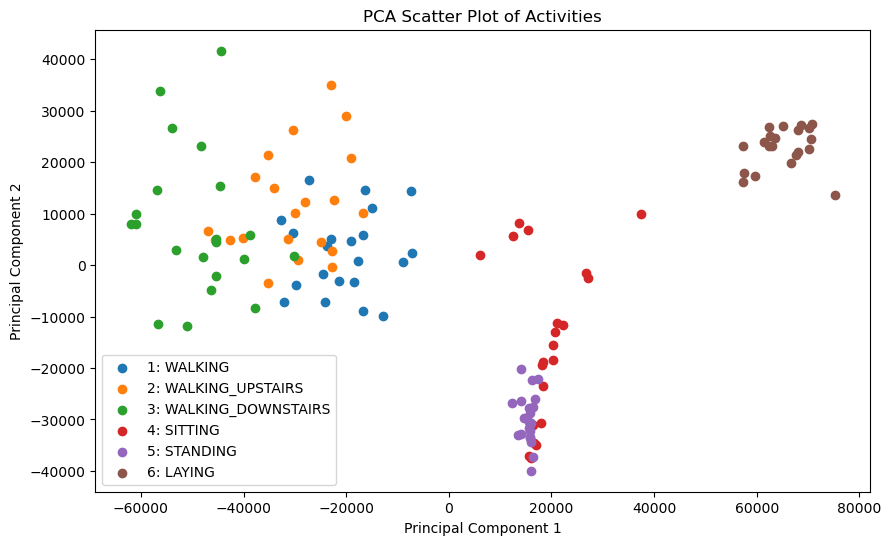

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Compute Total Acceleration
# X_train is assumed to be of shape (126, 500, 3)
total_acc = np.sum(X_train**2, axis=2) # Resulting shape will be (126, 500)

# Step 2: Apply PCA to reduce 500 dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(total_acc)  # Resulting shape will be (126, 2)

# Step 3: Scatter Plot
# Using the provided y_train for activity labels
# plt.figure(figsize=(10, 7))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', s=100)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA on Total Acceleration (126 samples)')
# plt.colorbar(label='Activity Class')
# plt.show()
classes = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}


plt.figure(figsize=(10, 6))
for activity in np.unique(y_train):
    idxs = np.where(y_train == activity)
    activity_name = classes[activity]  # Map numeric label to activity name
    plt.scatter(pca_features[idxs, 0], pca_features[idxs, 1], label=f'{activity}: {activity_name}')

plt.title('PCA Scatter Plot of Activities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [6]:
pip install tsfel


Note: you may need to restart the kernel to use updated packages.


In [7]:
import tsfel
import numpy as np
import pandas as pd

# Example data shape: (126, 500, 3)
# Assuming your data is in `X_train` with shape (126, 500, 3)

# Step 1: Get the TSFEL configuration for the features you want to extract
cfg = tsfel.get_features_by_domain()  # You can specify domains like 'temporal', 'spectral', etc.

# Step 2: Initialize a list to hold all extracted features
features_list = []

# Loop over each sample in the dataset
for i in range(X_train.shape[0]):
    # Initialize an empty list to store features for each axis (accx, accy, accz)
    sample_features = []
    
    # Loop over each axis (accx, accy, accz)
    for j in range(X_train.shape[2]):
        # Extract features for this specific axis
        axis_data = X_train[i, :, j]  # Extracting 1D time series for the current axis
        axis_features = tsfel.time_series_features_extractor(cfg, axis_data, verbose=0)
        
        # Store the features
        sample_features.append(axis_features)
    
    # Combine features from all axes (accx, accy, accz)
    combined_features = pd.concat(sample_features, axis=1)
    features_list.append(combined_features)

# Combine all extracted features into a single DataFrame
all_features_df = pd.concat(features_list, axis=0)

# Check the shape of the final feature set
print("Extracted features shape:", all_features_df.shape)


C:\Users\sreej\AppData\Local\Temp\ipykernel_5720\2529149041.py:23: UserWarning: Using default sampling frequency set in configuration file.
  axis_features = tsfel.time_series_features_extractor(cfg, axis_data, verbose=0)
C:\Users\sreej\AppData\Local\Temp\ipykernel_5720\2529149041.py:23: UserWarning: Using default sampling frequency set in configuration file.
  axis_features = tsfel.time_series_features_extractor(cfg, axis_data, verbose=0)
C:\Users\sreej\AppData\Local\Temp\ipykernel_5720\2529149041.py:23: UserWarning: Using default sampling frequency set in configuration file.
  axis_features = tsfel.time_series_features_extractor(cfg, axis_data, verbose=0)
C:\Users\sreej\AppData\Local\Temp\ipykernel_5720\2529149041.py:23: UserWarning: Using default sampling frequency set in configuration file.
  axis_features = tsfel.time_series_features_extractor(cfg, axis_data, verbose=0)
C:\Users\sreej\AppData\Local\Temp\ipykernel_5720\2529149041.py:23: UserWarning: Using default sampling frequency

Extracted features shape: (126, 1152)


C:\Users\sreej\AppData\Local\Temp\ipykernel_5720\2529149041.py:23: UserWarning: Using default sampling frequency set in configuration file.
  axis_features = tsfel.time_series_features_extractor(cfg, axis_data, verbose=0)


Explained variance by each component: [0.7310209  0.20378441]


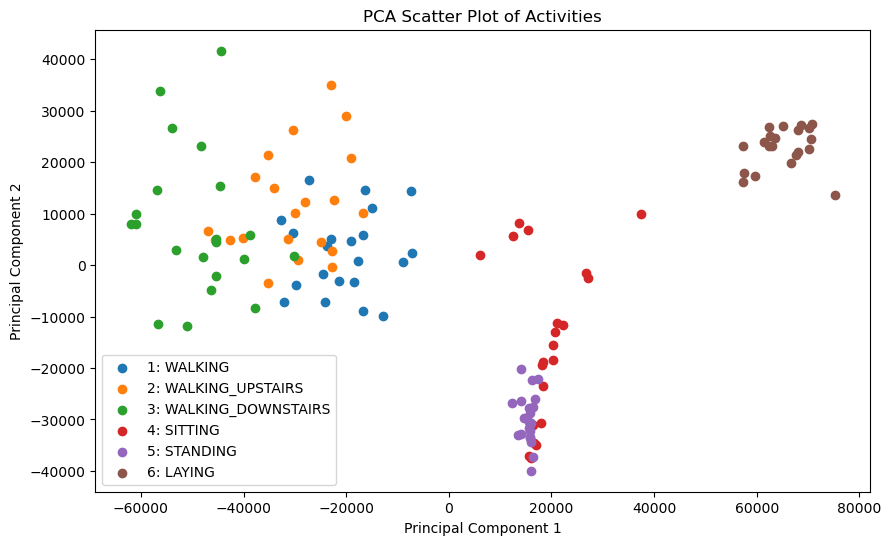

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
classes = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}


# Step 1: Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_features = pca.fit_transform(all_features_df)

# Step 2: Visualize the explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

# Step 3: Plot the PCA results
plt.figure(figsize=(10, 6))
for activity in np.unique(y_train):
    idxs = np.where(y_train == activity)
    activity_name = classes[activity]  # Map numeric label to activity name
    plt.scatter(pca_features[idxs, 0], pca_features[idxs, 1], label=f'{activity}: {activity_name}')

plt.title('PCA Scatter Plot of Activities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


#### Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

In [9]:
import pandas as pd

# File paths
input_file = r'.\UCI HAR Dataset\train\X_train.txt'  # Replace with your input file path

# Read the first 500 lines from the text file
data = []
with open(input_file, 'r') as file:
    for i, line in enumerate(file):
        if i >= 500:
            break
        # Split the line into individual numbers, assuming space-separated values
        row = line.strip().split()
        data.append(row)

# Convert the list of rows into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

df.shape
# Optionally, save the DataFrame to a CSV file
# output_file = 'output.csv'  # Replace with your desired output file path
# df.to_csv(output_file, index=False, header=False)

# print("Data has been successfully written to the DataFrame and saved as a CSV file.")

                0                1                2                3    \
0    2.8858451e-001  -2.0294171e-002  -1.3290514e-001  -9.9527860e-001   
1    2.7841883e-001  -1.6410568e-002  -1.2352019e-001  -9.9824528e-001   
2    2.7965306e-001  -1.9467156e-002  -1.1346169e-001  -9.9537956e-001   
3    2.7917394e-001  -2.6200646e-002  -1.2328257e-001  -9.9609149e-001   
4    2.7662877e-001  -1.6569655e-002  -1.1536185e-001  -9.9813862e-001   
..              ...              ...              ...              ...   
495  3.5930724e-001  -3.7890725e-002  -1.4053428e-001  -3.8594961e-001   
496  3.5614452e-001   3.3888051e-003  -1.4063527e-001  -4.0551511e-001   
497  1.7331223e-001  -1.0352888e-001  -2.4207289e-001  -3.1355264e-001   
498  2.6248578e-001  -2.9029148e-002  -8.8647354e-002  -3.5728131e-001   
499  2.7395140e-001  -2.8792770e-002  -1.1273408e-002  -4.0008864e-001   

                 4                5                6                7    \
0    -9.8311061e-001  -9.1352645e-00

(500, 561)

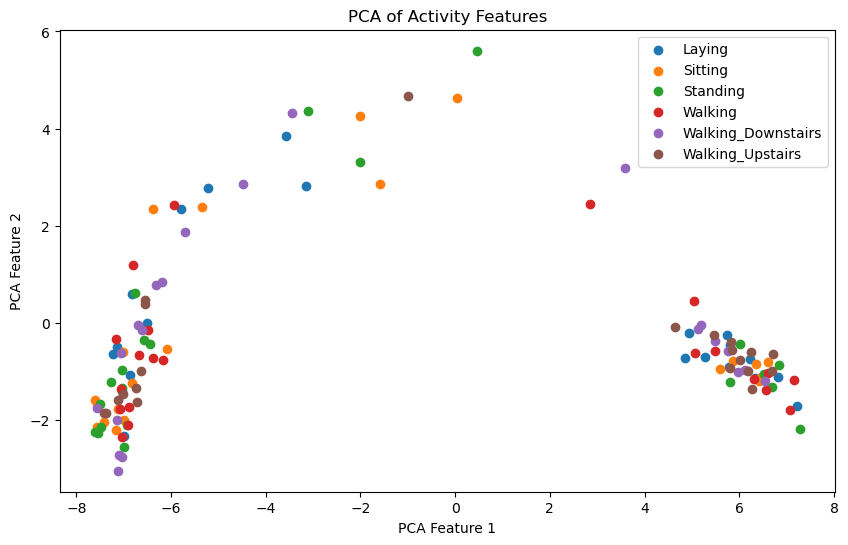

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train_features is your feature matrix of shape (126, 561)
# Assuming y_train contains the corresponding activity labels

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Map numeric labels to activity names
activity_map = {
    1: 'Walking',
    2: 'Walking_Upstairs',
    3: 'Walking_Downstairs',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
}

activity_names = np.array([activity_map[label] for label in y_train])

# Plot the PCA results
plt.figure(figsize=(10, 6))

# Iterate over the activity names and their corresponding numeric labels
for activity_name in np.unique(activity_names):
    idxs = np.where(activity_names == activity_name)
    plt.scatter(pca_result[idxs, 0], pca_result[idxs, 1], label=activity_name)

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA of Activity Features')
plt.legend()
plt.show()


#### Ques 4 : Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]

In [15]:
correlation_matrix = all_features_df.corr()


threshold = 0.9  # Define a threshold for high correlation
high_corr_pairs = []

# Iterate through the correlation matrix to find highly correlated pairs
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display highly correlated feature pairs
print("Highly correlated features (correlation > 0.9):")
for pair in high_corr_pairs:
    print(f"Features: {pair[0]} and {pair[1]} | Correlation: {pair[2]:.2f}")


# Features with a correlation very close to 1 or -1 are likely redundant
redundant_features = [pair for pair in high_corr_pairs if abs(pair[2]) >= 0.99]
print("\nPotential redundant features (correlation > 0.99):")
for pair in redundant_features:
    print(f"Features: {pair[0]} and {pair[1]} | Correlation: {pair[2]:.2f}")

Highly correlated features (correlation > 0.9):
Features: 0_Absolute energy and 0_Average power | Correlation: 1.00
Features: 0_Area under the curve and 0_Mean | Correlation: 0.99
Features: 0_Area under the curve and 0_Root mean square | Correlation: 1.00
Features: 0_FFT mean coefficient_210 and 0_FFT mean coefficient_243 | Correlation: 0.99
Features: 0_FFT mean coefficient_210 and 0_FFT mean coefficient_249 | Correlation: 0.99
Features: 0_FFT mean coefficient_211 and 0_FFT mean coefficient_219 | Correlation: 1.00
Features: 0_FFT mean coefficient_211 and 0_FFT mean coefficient_230 | Correlation: 0.99
Features: 0_FFT mean coefficient_211 and 0_FFT mean coefficient_231 | Correlation: 0.99
Features: 0_FFT mean coefficient_211 and 0_FFT mean coefficient_242 | Correlation: 0.99
Features: 0_FFT mean coefficient_211 and 0_FFT mean coefficient_250 | Correlation: 0.99
Features: 0_FFT mean coefficient_212 and 0_FFT mean coefficient_249 | Correlation: 0.99
Features: 0_FFT mean coefficient_214 and